In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants
import scipy.special
from qutip import *
import random
from numpy.random import choice
import matplotlib.cm as cm
from sympy import *
from IPython.display import Image
from sympy.physics.wigner import wigner_6j
from sympy.physics.quantum.cg import CG
import tqdm
from numpy import random
from scipy.optimize import curve_fit

""" 
constants
"""
pi = np.pi
c = sp.constants.c
g = sp.constants.g
epsilon0 = sp.constants.epsilon_0
hbar = sp.constants.hbar
h = sp.constants.h
u = sp.constants.physical_constants['atomic mass constant'][0]
kB = sp.constants.physical_constants['Boltzmann constant'][0]
mB = sp.constants.physical_constants['Bohr magneton'][0]

# α/h [Hz/(V/m)2]=2.48832×10−8 α [a.u.] from https://arxiv.org/pdf/1507.06570.pdf
# α [a.u.] = 1.648 777 274 36 x 10-41 α [C2 m2 J-1] #https://physics.nist.gov/cgi-bin/cuu/Value?auepol
a_au = 1.64877727436*1e-41

In [2]:
def I0(P, w0):
    return 2*P/np.pi/w0**2

def E0(I0):
    return np.sqrt(2*I0/epsilon0/c)

In [23]:
def Egauss(rho, theta, z, _lambda, P, w0):
    
    amp = E0(I0(P,w0))
    zR = np.pi*w0**2/_lambda
    wz = w0*np.sqrt(1+(z/zR)**2)
    k = 2*np.pi/_lambda
    
    return amp*w0/wz*np.exp(-rho**2/wz**2)*np.exp(-1j*(k*z)) 

In [165]:
w0 = 2e-3
P = 1
_lambda = 518e-9
z0 = 0

N0 = 10000
d0 = 5e-3
rho0 = np.linspace(0, d0, N0)

Er = np.zeros(N0)
Ei = np.zeros(N0)

for i,r0 in enumerate(rho0):
    t0 = 0
    Er[i]=np.real(Egauss(r0, t0, z0, _lambda, P, w0))
    Ei[i]=np.imag(Egauss(r0, t0, z0, _lambda, P, w0))

E = Er+1j*Ei

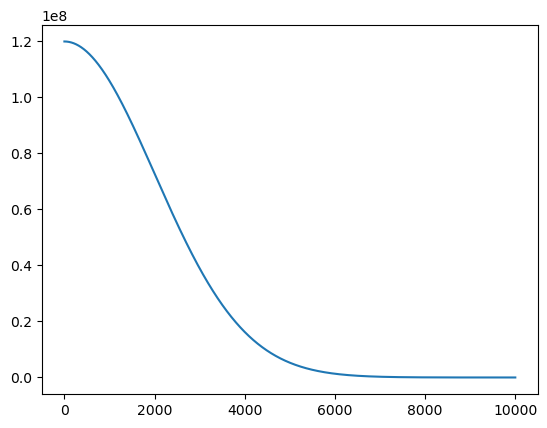

In [166]:
plt.plot(abs(E)**2)

In [81]:
def mask(rho, R):
    M = np.zeros(N0)
    for i,r in enumerate(rho):
        if r<R:
            M[i]=1
        else: 
            M[i]=0
    return M

In [134]:
R=10e-3
M = mask(rho0, R)
Enew = E*M

plt.plot(abs(Enew)**2)

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [155]:
def Fresnel(rho, z, rho0, z0, _lambda, E):
    drho0 = rho0[1]-rho0[0]
    k = 2*np.pi/_lambda
    alpha = 0.5/180*np.pi
    n=1.45
    R=12.7e-3
    F = -2*np.pi*1j*np.exp(1j*k*(z-z0))*np.exp(1j*k*rho**2/2/(z-z0)) / _lambda / (z-z0) * np.sum( [r0*drho0*E[i]*np.exp(1j*k*r0**2/2/(z-z0)+1j*alpha*(n-1)*(R-r0)*k)*sp.special.jv(0,k*rho*r0/(z-z0)) for i,r0 in enumerate(rho0)] )
    return F

In [167]:
rho0 = np.linspace(0, 0.5e-3, 10000)
rho = np.linspace(0, 1e-3, 10000)
z = 100e-3
_lambda=518e-9
F = Fresnel(rho, z, rho0, z0, _lambda, E)

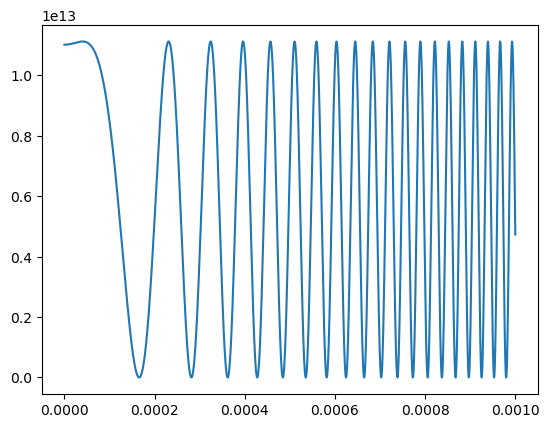

In [168]:
plt.plot(rho, np.real(F)**2)
#plt.plot(rho, np.imag(F))
#plt.xlim(0, 0.1e-3)

In [169]:
w0 = 2e-3
P = 1
_lambda = 518e-9
z0 = 0

N0 = 10000
d0 = 5e-3
rho0 = np.linspace(0, d0, N0)

Er = np.zeros(N0)
Ei = np.zeros(N0)

for i,r0 in enumerate(rho0):
    t0 = 0
    Er[i]=np.real(Egauss(r0, t0, z0, _lambda, P, w0))
    Ei[i]=np.imag(Egauss(r0, t0, z0, _lambda, P, w0))

E = Er+1j*Ei

In [179]:
D=1e-3
rho = np.linspace(0, .5e-3, 1000)
z = 100e-3
k = 2*np.pi/_lambda
intensity = (np.pi*D**2/4/_lambda/z)**2*(2*sp.special.jv(1,k*D*rho/2/z)/(k*D*rho/2/z) )**2

C:\Users\klab\AppData\Local\Temp\ipykernel_37220\3598251948.py:5: RuntimeWarning: invalid value encountered in divide
  intensity = (np.pi*D**2/4/_lambda/z)**2*(2*sp.special.jv(1,k*D*rho/2/z)/(k*D*rho/2/z) )**2


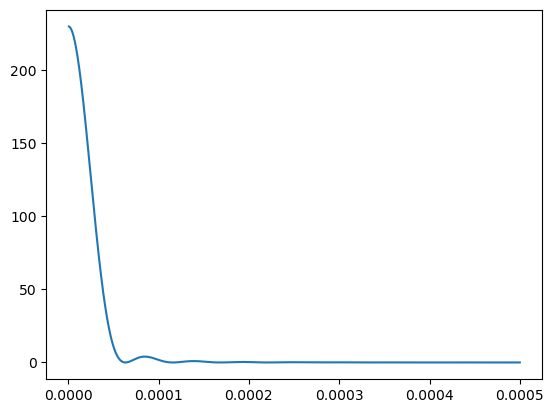

In [180]:
plt.plot(rho, intensity)
#plt.axhline((w0/30e-6)**2)